Resample by the day and take the average temperature. Visualize the average temperature over time.

Write the code necessary to visualize the minimum temperature over time.

Write the code necessary to visualize the maximum temperature over time.

Which month is the coldest, on average?

Which month has the highest average temperature?

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [1]:
import pandas as pd
from vega_datasets import data

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
data.sf_temps().head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df = data.sf_temps()

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
# from example
df.date = pd.to_datetime(df.date)

In [6]:
# set index to date column
df = df.set_index('date').sort_index()

In [7]:
df.head(10)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
2010-01-01 05:00:00,45.8
2010-01-01 06:00:00,45.9
2010-01-01 07:00:00,45.9
2010-01-01 08:00:00,46.4


Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
# Sort by day using average display top 10 results
df.resample('D').mean().head(10)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
2010-01-06,49.529167
2010-01-07,49.466667
2010-01-08,49.475000
2010-01-09,49.537500


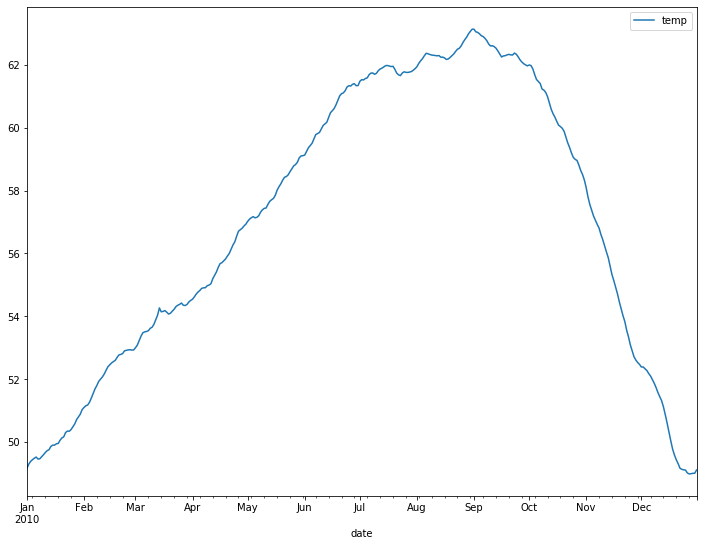

In [9]:
# plot results by adding .plot

plt.rc('figure', figsize=(12, 9))
df.resample('D').mean().plot()

Write the code necessary to visualize the minimum temperature over time.

Write the code necessary to visualize the maximum temperature over time.

Which month is the coldest, on average?

Which month has the highest average temperature?
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

Write the code necessary to visualize the minimum temperature over time.

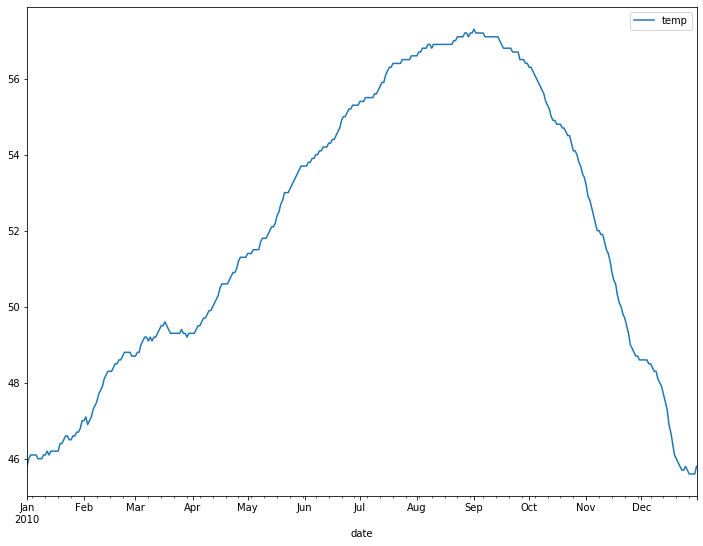

In [10]:
plt.rc('figure', figsize=(12, 9))
df.resample('D').min().plot()

Write the code necessary to visualize the maximum temperature over time.

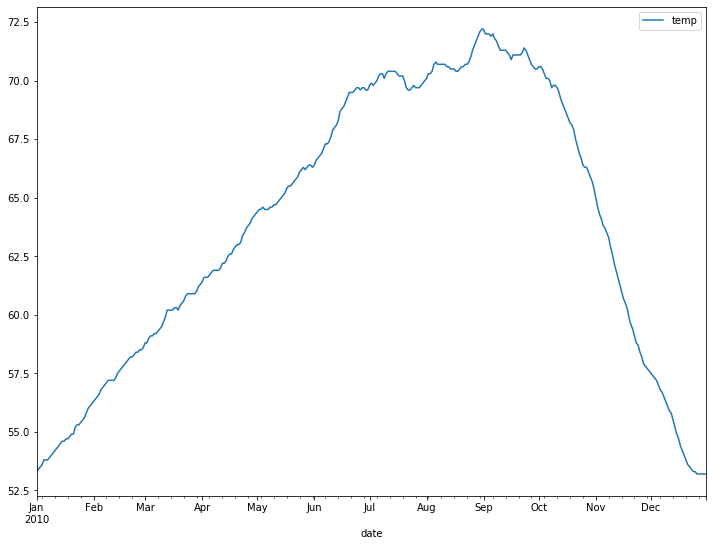

In [11]:
plt.rc('figure', figsize=(12, 9))
df.resample('D').max().plot()

Which month is the coldest, on average?

Which month has the highest average temperature?

In [12]:
df.resample('M').mean().min()

temp    49.98414
dtype: float64

In [13]:
df1 = df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().min()]

In [14]:
df1 = df1.dropna()
df1.index[0]

Timestamp('2010-01-31 00:00:00', freq='M')

Which month has the highest average temperature?

In [15]:
df2 = df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().max()]

df2 = df2.dropna()

df2.index[0]

Timestamp('2010-09-30 00:00:00', freq='M')

 Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
Write the code necessary to visualize the minimum temperature over time.

In [16]:
temp_change = df.resample('D').agg(['min','max'])
temp_change.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [17]:
temp_change.columns = [p1 + '_' + p2 for p1, p2 in temp_change.columns]
temp_change.head()

,temp_min,temp_max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [18]:
temp_change['daily_change'] = temp_change.temp_max - temp_change.temp_min

temp_change.head()

,temp_min,temp_max,daily_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [19]:
change = temp_change
change.head()

,temp_min,temp_max,daily_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [20]:
nan_change = change[change == change.max()]

clean_change = nan_change.daily_change.dropna()

clean_change.index[0]

Timestamp('2010-08-31 00:00:00', freq='D')

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines. Write the code necessary to visualize the minimum temperature over time.

In [21]:
change.head()

,temp_min,temp_max,daily_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [22]:
df = change
df.head()

,temp_min,temp_max,daily_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


Text(0.5, 1.0, 'Title of the Graph')

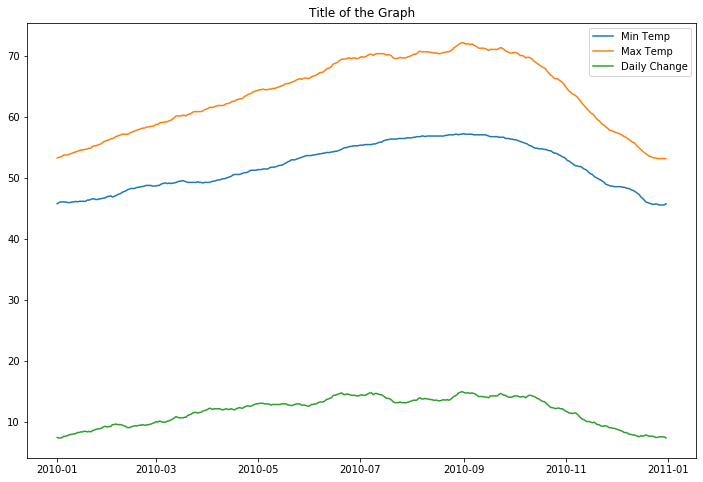

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(df.temp_min, label='Min Temp')
plt.plot(df.temp_max, label='Max Temp')
plt.plot(df.daily_change, label='Daily Change')

plt.legend()

plt.title("Title of the Graph")

Which year and month combination has the highest amount of precipitation?

Visualize the amount of monthly precipitation over time.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [24]:
df = data.seattle_weather()

In [25]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

Which year and month combination has the highest amount of precipitation?

In [27]:
df_p = df[['precipitation']]

In [28]:
df_sum = df_p.resample('M').mean()[df_p.resample('M').mean() == df_p.resample('M').mean().max()]

In [29]:
df_clean = df_sum.dropna()
df_clean.index[0]

Timestamp('2015-12-31 00:00:00', freq='M')

Visualize the amount of monthly precipitation over time.

In [30]:
df_p.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


Text(0.5, 1.0, 'Average Precipitation by Month')

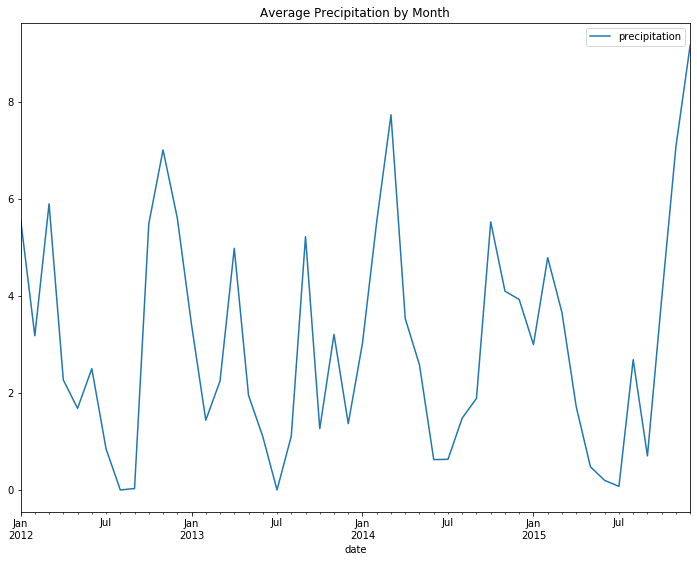

In [31]:
plt.rc('figure', figsize=(12, 9))

df_p.resample('M').mean().plot()

plt.title('Average Precipitation by Month')

Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [32]:
df_w = df[['wind']]

In [33]:
df_w = df_w.resample('D').mean()

Text(0.5, 1.0, 'Average Wind by Day')

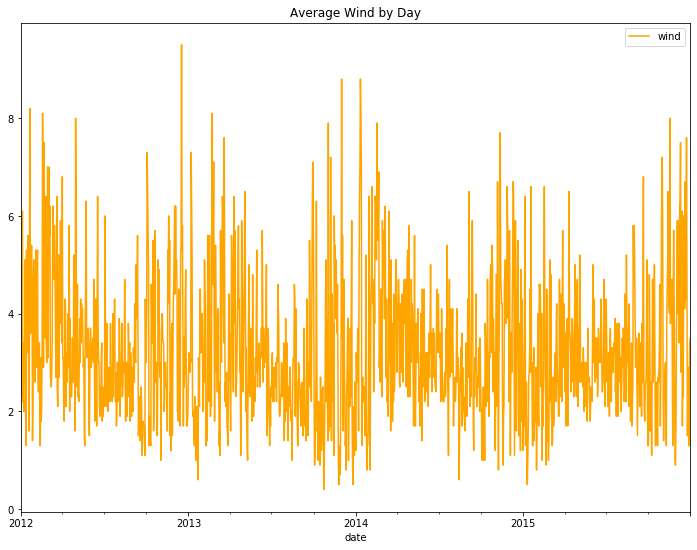

In [34]:
df_w.plot(color='orange')
plt.title("Average Wind by Day")

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days 

where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [35]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


Which year-month combination is the windiest?

In [36]:
df_w = df[['wind']]

In [37]:
df_w = df_w.resample('M').mean()[df_w.resample('M').mean() == df_w.resample('M').mean().max()]

In [38]:
df_clean = df_w.dropna()

In [39]:
df_clean.index[0]

Timestamp('2014-02-28 00:00:00', freq='M')

What's the sunniest year? (Hint: which day has the highest number of days
where weather == sun?)

In [40]:
df_w = df[['weather']]

In [41]:
df_w["sunny"] = np.where(df['weather']=='sun', 1, 0)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_w = df_w.resample('Y').sum()
df_w = df_w[df_w == df_w.max()]
df_w.dropna(inplace=True)
df_w.index[0]

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In which month does it rain the most?

In [49]:
df_w = df[['wind']]
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
